## Part i: Team Conference table prep

In [ ]:
#basic_college_football_stats.csv

In [124]:
import pandas as pd
import numpy as np

In [125]:
# import data
data = pd.read_csv('../data/raw/basic_college_football_stats.csv')

In [131]:
# define function
def create_team_conference_df(df: pd.DataFrame) -> pd.DataFrame:
    '''
    this function takes a dataframe with team names and conference names and separates it into columns
    for future mapping
    input: pd.DataFrame
    output: pd.DataFrame
    '''
    # create new dataframe, select team column
    team_conference = pd.DataFrame(df['Team']) 
    
    # create blank dataframe
    team_conference_split = pd.DataFrame()
    
    # split team & conference
    team_conference_split = team_conference['Team'].str.rsplit(pat=' (', n=1, expand=True)
    
    # rename columns
    team_conference_split.columns = ['team_name', 'conference_name']
    
    # string improvement: replace the closing parenthesis, lowercase
    team_conference_split['conference_name'] = team_conference_split['conference_name'].str.replace(')', '', n=1)
    team_conference_split['conference_name']=team_conference_split['conference_name'].str.lower()
    team_conference_split['team_name']=team_conference_split['team_name'].str.lower()

    return team_conference_split

    
    

In [132]:
#call function
team_conference = create_team_conference_df(data)

In [135]:
team_conference

,team_name,conference_name,team_name_matched
0,tennessee,sec,tennessee
1,washington,pac-12,washington
2,southern california,pac-12,usc
3,ucla,pac-12,ucla
4,georgia,sec,georgia
...,...,...,...
126,rutgers,big ten,rutgers
127,colorado,pac-12,colorado
128,massachusetts,fbs independent,massachusetts
129,iowa,big ten,iowa


In [134]:
team_conference['team_name_matched'] = team_conference['team_name'].replace({'southern california': 'usc', 'ole miss': 'mississippi', 'boston college': 'boston col.'
    ,'nc state': 'north carolina st.', 'ucf': 'central florida', 'central mich.': 'central michigan',
        'eastern mich.':  'eastern michigan'
        })


In [35]:
# check value counts
team_conference['conference_name'].value_counts()

conference_name
sec                14
big ten            14
acc                14
sun belt           14
pac-12             12
mac                12
mountain west      12
c-usa              11
aac                11
big 12             10
fbs independent     7
Name: count, dtype: int64

In [120]:
#team_conference['team_name'].unique()

## part ii: add conference column to superbowl winning rosters

In [164]:
# import data
data_rosters = pd.read_csv('../data/cleaned/all_superbowl_winning_rosters.csv')

In [165]:
data_rosters['team'].unique()

array(['kansas', 'neworleans', 'greenbay', 'dallas', 'pittsburgh',
       'newyork', 'baltimore', 'newengland', 'sanfrancisco', 'denver',
       'philadelphia', 'tampa', 'washington', 'chicago', 'indiapolis',
       'oakland', 'miami', 'sanfran', 'newyorkj', 'stlouis', 'la',
       'seattle'], dtype=object)

In [166]:
data_rosters['college']=data_rosters['college'].str.lower()

In [174]:
merge_table = pd.merge(
    data_rosters, team_conference,
    left_on='college', right_on='team_name_matched',
    how='left', suffixes=('_left', '_right')
)
merge_table.drop('team_name_matched', axis=1, inplace=True)
merge_table.drop('team_name', axis=1, inplace=True)

In [168]:
merge_table['conference_name'].value_counts(dropna=False)

conference_name
NaN                772
big ten            465
sec                427
pac-12             403
acc                395
big 12             208
aac                135
mountain west      110
fbs independent    103
mac                 58
sun belt            46
c-usa               37
Name: count, dtype: int64

In [175]:
data_rosters.columns

Index(['year', 'team', 'no.', 'player', 'age', 'position', 'games_played',
       'games_started', 'weight', 'height', 'college', 'date_of_birth',
       'years_in_league', 'approx_value', 'drafted_(tm/rnd/pick/yr)',
       'player_additional', 'salary', 'drafted_team/undrafted',
       'drafted_round', 'drafted_pick', 'drafted_year'],
      dtype='object')

In [176]:
merge_table.columns

Index(['year', 'team', 'no.', 'player', 'age', 'position', 'games_played',
       'games_started', 'weight', 'height', 'college', 'date_of_birth',
       'years_in_league', 'approx_value', 'drafted_(tm/rnd/pick/yr)',
       'player_additional', 'salary', 'drafted_team/undrafted',
       'drafted_round', 'drafted_pick', 'drafted_year', 'conference_name'],
      dtype='object')

### Other checks and word/name matching

In [69]:
null_conference_name = merge_table[pd.isnull(merge_table['conference_name'])]

In [71]:
null_conference_name_ranked=null_conference_name['college'].value_counts()

college
usc                            64
boston col.                    33
mississippi                    20
north carolina st.             18
florida a&m                    17
                               ..
illinoisvanderbilt              1
cerritos (ca)ucla               1
bridgeportconnecticut           1
wyomingbishop                   1
wisconsinnorth carolina st.     1
Name: count, Length: 338, dtype: int64

In [73]:
merge_table['college'].value_counts()


college
usc                            64
miami (fl)                     63
penn st.                       62
notre dame                     60
michigan                       56
                               ..
east mississippi cctroy         1
columbia                        1
georgia militaryflorida         1
utahbaylor                      1
wisconsinnorth carolina st.     1
Name: count, Length: 442, dtype: int64

In [87]:
#merge_table['college'].unique()


In [83]:
team_conference[['team_name']].sort_values(by='team_name')

,team_name
58,air force
79,akron
10,alabama
25,app state
19,arizona
...,...
56,west virginia
6,western ky.
124,western mich.
90,wisconsin


In [94]:
top_50_list = merge_table['college'].value_counts().index[:50].to_list()
top_50_list

['usc',
 'miami (fl)',
 'penn st.',
 'notre dame',
 'michigan',
 'lsu',
 'tennessee',
 'ucla',
 'georgia',
 'ohio st.',
 'colorado',
 'florida st.',
 'oklahoma',
 'oregon',
 'alabama',
 'washington',
 'nebraska',
 'florida',
 'michigan st.',
 'texas a&m',
 'north carolina',
 'clemson',
 'purdue',
 'pittsburgh',
 'illinois',
 'byu',
 'arizona st.',
 'boston col.',
 'stanford',
 'california',
 'texas',
 'auburn',
 'wisconsin',
 'iowa',
 'tcu',
 'syracuse',
 'rutgers',
 'kansas',
 'minnesota',
 'maryland',
 'virginia',
 'arkansas',
 'louisville',
 'south carolina',
 'texas tech',
 'utah',
 'oklahoma st.',
 'smu',
 'cincinnati',
 'mississippi']

In [103]:
null_conference_name['college'].value_counts()[:50]

college
usc                         64
boston col.                 33
mississippi                 20
north carolina st.          18
florida a&m                 17
grambling st.               16
tennessee st.               13
southern miss               13
jackson st.                 11
western illinois            11
idaho                       11
eastern michigan            11
central florida             10
south carolina st.           9
texas-arlington              9
south dakota st.             9
texas southern               9
alcorn st.                   8
brown                        8
southern                     8
northwestern st. (la)        8
texas a&m-commerce           8
md-eastern shore             7
central michigan             7
cal poly-san luis obispo     7
texas-el paso                7
west texas a&m               7
morgan st.                   7
south florida                7
western carolina             7
ark-pine bluff               7
texas a&m-kingsville         7


In [114]:
#team_conference.loc[~team_conference['team_name'].isin(top_50_list)]

In [118]:
team_conference.columns

Index(['team_name', 'conference_name'], dtype='object')

In [ ]:
# 'southern california', 'usc'
# 'ole miss', 'mississippi'
# 'boston college', 'boston col.'
# 'nc state', 'north carolina st.'
# 'ucf', 'central florida'
# 'central mich.', 'central michigan'
# 'eastern mich.', 'eastern michigan'


#not on the list:
#from rosters:
#idaho: Big Sky Conference

In [ ]:
#merge_table_2 = pd.merge(
    team_conference, data_rosters,
    left_on='team_name', right_on='college',
    how='left', suffixes=('_left', '_right')
)

In [112]:
merge_table_2_b=merge_table_2[['team_name','conference_name','college']]

In [111]:
null_conference_name_conf = merge_table_2_b[pd.isnull(merge_table_2_b['college'])]

In [113]:
null_conference_name_conf

,team_name,conference_name,college
92,southern california,pac-12,NaN
235,western ky.,c-usa,NaN
236,ole miss,sec,NaN
370,utsa,c-usa,NaN
457,ucf,aac,NaN
480,ga. southern,sun belt,NaN
647,app state,sun belt,NaN
783,uab,c-usa,NaN
951,south alabama,sun belt,NaN
988,georgia st.,sun belt,NaN


### File export

In [199]:
file_path = '../data/cleaned/all_superbowl_winning_rosters_wconference.csv'

merge_table.to_csv(file_path, index=False)

## part iii: Visualization

### data prep

In [177]:
# Define a function to calculate the decade
def get_decade(year):
    return str(year)[:3] + "0s"

# Apply the function to add the decade column
merge_table['decade'] = merge_table['year'].apply(get_decade)


In [178]:
merge_table[['decade','year']]

,decade,year
0,2020s,2022
1,2020s,2022
2,2020s,2022
3,2020s,2022
4,2020s,2022
...,...,...
3154,1960s,1966
3155,1960s,1966
3156,1960s,1966
3157,1960s,1966


In [179]:
merge_table.columns

Index(['year', 'team', 'no.', 'player', 'age', 'position', 'games_played',
       'games_started', 'weight', 'height', 'college', 'date_of_birth',
       'years_in_league', 'approx_value', 'drafted_(tm/rnd/pick/yr)',
       'player_additional', 'salary', 'drafted_team/undrafted',
       'drafted_round', 'drafted_pick', 'drafted_year', 'conference_name',
       'decade'],
      dtype='object')

In [ ]:
import seaborn as sns
sns.swarmplot(x = merge_table.loc[merge_table['decade'] == '1990s']['team'], y = merge_table['conference_name'])

<Axes: xlabel='years_in_league', ylabel='decade'>

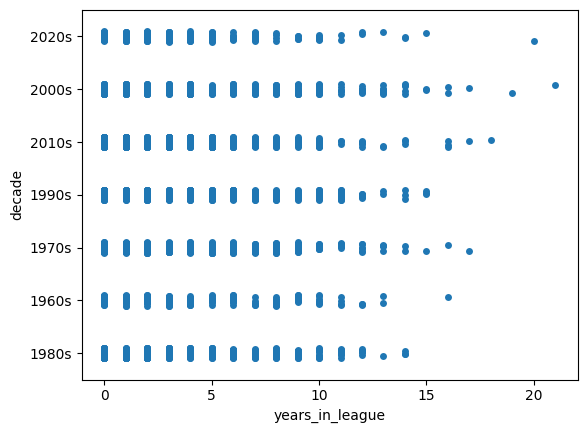

In [198]:
import seaborn as sns
sns.stripplot(x = merge_table['years_in_league'], y = merge_table['decade'])

<Axes: xlabel='count', ylabel='college'>

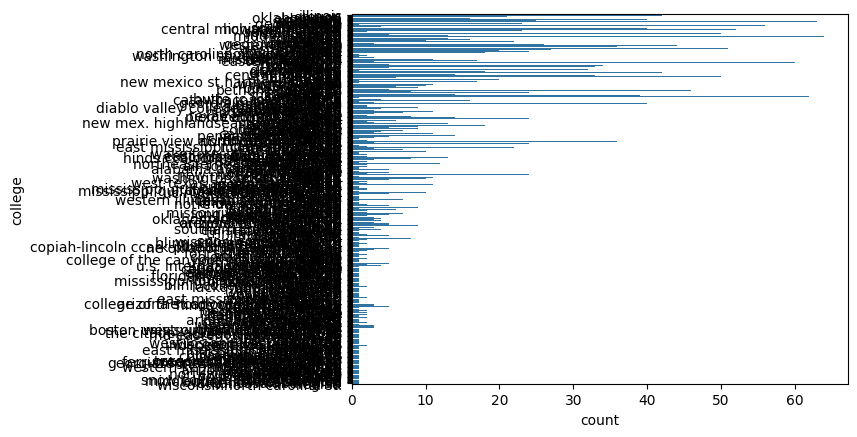

In [182]:
import seaborn as sns
sns.countplot(merge_table['college'])

<Axes: xlabel='count', ylabel='conference_name'>

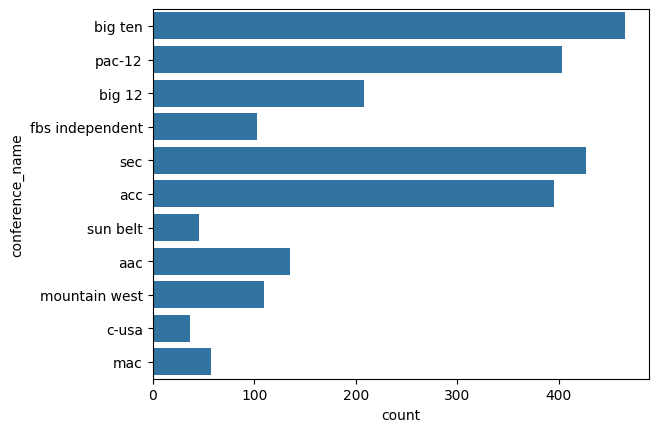

In [148]:
import seaborn as sns
sns.countplot(merge_table['conference_name'])